In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import re


# Load Data

In [2]:
from lib.io.load import load_data

In [3]:
df = load_data()
df.head()

Loading data from: ../data/raw/train.csv


/home/ali/Desktop/aiPrac/ML/credit_score/notebooks/lib/io/load.py:20: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Remove Duplicates

In [4]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

[0 rows x 28 columns]


# Drop Columns

In [5]:
from lib.preprocessing.cleaning import drop_columns

In [6]:
columns_to_drop = [
    "ID",
    "Name",  
    "SSN",  
    "Customer_ID",  
]

df = drop_columns(df, columns_to_drop)  

Column 'ID' dropped successfully.
Column 'Name' dropped successfully.
Column 'SSN' dropped successfully.
Column 'Customer_ID' dropped successfully.


# Correct Data Types

In [7]:
df.dtypes

Month                        object
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

In [8]:
# Annual_Income (object → float64)
df['Annual_Income'] = df['Annual_Income'].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)

# Num_of_Loan (object → int64)
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce').fillna(0).astype(int)

# Num_of_Delayed_Payment (object → int64)
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce').fillna(0).astype(int)

# Changed_Credit_Limit (object → float64)
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')

# Outstanding_Debt (object → float64)
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace(r'[^\d.]', '', regex=True).astype(float)

# Amount_invested_monthly (object → float64)
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

# Monthly_Balance (object → float64)
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')


In [49]:
# Age (object → int64)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
age_median = int(df['Age'].median())  # Compute median of non-NaN values and cast to int
df['Age'] = df['Age'].fillna(age_median).astype(int)

# Handle Negative Values
median_age = int(df[df['Age'] >= 0]['Age'].median())  # Ensure median_age is an integer
df['Age'] = df['Age'].apply(lambda x: median_age if x < 0 else x).astype(int)

df.drop(df[df['Age'] > 100].index, inplace = True)
df.drop(df[df['Age'] < 0].index, inplace = True)

In [50]:
negative_ages = df[df['Age'] < 0]
num_negative = len(negative_ages)
print(f"Number of records with negative ages: {num_negative}")

Number of records with negative ages: 0


# Clean Categorical Columns

In [11]:
df['Occupation'] = df['Occupation'].replace("_______", "Unknown")

# Standardize format by converting to title case and removing extra spaces
df['Occupation'] = df['Occupation'].str.title().str.strip()

# Check for duplicates by printing unique values
print("Unique Occupations after cleaning:")
print(df['Occupation'].unique())

# Verify the cleaned column with value counts
print("\nOccupation distribution after cleaning:")
print(df['Occupation'].value_counts())

Unique Occupations after cleaning:
['Scientist' 'Unknown' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

Occupation distribution after cleaning:
Occupation
Unknown          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64


In [12]:
df['Credit_Mix'] = df['Credit_Mix'].fillna("Unknown")
# Replace "_" with "Unknown"
df['Credit_Mix'] = df['Credit_Mix'].replace("_", "Unknown")
# Standardize format - convert to title case and strip extra spaces
df['Credit_Mix'] = df['Credit_Mix'].str.title().str.strip()

print("Unique values in Credit_Mix after cleaning:")
print(df['Credit_Mix'].unique())

Unique values in Credit_Mix after cleaning:
['Unknown' 'Good' 'Standard' 'Bad']


In [13]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].fillna("Unknown")
# Replace "NM" with "Unknown"
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace("NM", "Unknown")
# Standardize format - convert to title case and strip extra spaces
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].str.title().str.strip()

print("Unique values in Payment_of_Min_Amount after cleaning:")
print(df['Payment_of_Min_Amount'].unique())

Unique values in Payment_of_Min_Amount after cleaning:
['No' 'Unknown' 'Yes']


In [14]:
df['Payment_Behaviour']

0         High_spent_Small_value_payments
1          Low_spent_Large_value_payments
2         Low_spent_Medium_value_payments
3          Low_spent_Small_value_payments
4        High_spent_Medium_value_payments
                       ...               
99995     High_spent_Large_value_payments
99996    High_spent_Medium_value_payments
99997     High_spent_Large_value_payments
99998      Low_spent_Large_value_payments
99999                              !@9#%8
Name: Payment_Behaviour, Length: 100000, dtype: object

In [15]:
# Replace NaN values with "Unknown"
df['Payment_Behaviour'] = df['Payment_Behaviour'].fillna("Unknown")
# Replace special characters with "Unknown"
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace("!@9#%8", "Unknown")
# Standardize format - replace underscores with spaces, convert to title case, and strip extra spaces
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace("_", " ").str.title().str.strip()

# Check for duplicates by printing unique values
print("Unique values in Payment_Behaviour after cleaning:")
unique_values = df['Payment_Behaviour'].unique()
print(unique_values)

duplicate_mapping = {
    "Low Spent Small": "Low Spent Small Value Payments",
    "High Spent Small": "High Spent Small Value Payments",
    "Low Spent Large": "Low Spent Large Value Payments",
    "Low Spent Medium": "Low Spent Medium Value Payments",
    "High Spent Medium": "High Spent Medium Value Payments",
    "High Spent Large": "High Spent Large Value Payments",
    "Unknown": "Unknown"
}

df['Payment_Behaviour'] = df['Payment_Behaviour'].replace(duplicate_mapping)

# Verify the cleaned column with value counts
print("\nPayment_Behaviour distribution after cleaning:")
print(df['Payment_Behaviour'].value_counts())

Unique values in Payment_Behaviour after cleaning:
['High Spent Small Value Payments' 'Low Spent Large Value Payments'
 'Low Spent Medium Value Payments' 'Low Spent Small Value Payments'
 'High Spent Medium Value Payments' 'Unknown'
 'High Spent Large Value Payments']

Payment_Behaviour distribution after cleaning:
Payment_Behaviour
Low Spent Small Value Payments      25513
High Spent Medium Value Payments    17540
Low Spent Medium Value Payments     13861
High Spent Large Value Payments     13721
High Spent Small Value Payments     11340
Low Spent Large Value Payments      10425
Unknown                              7600
Name: count, dtype: int64


In [16]:
print("Unique values before cleaning:", df['Credit_Score'].unique())

# Standardize the format - strip extra spaces and convert to title case
df['Credit_Score'] = df['Credit_Score'].str.strip().str.title()

# Check unique values after cleaning
print("Unique values after cleaning:", df['Credit_Score'].unique())

Unique values before cleaning: ['Good' 'Standard' 'Poor']
Unique values after cleaning: ['Good' 'Standard' 'Poor']


# Handle Special Columns

In [17]:
print(df['Month'].head())


0     January
1    February
2       March
3       April
4         May
Name: Month, dtype: object


In [18]:
# # Month 
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

month_mapping = {month: i for i, month in enumerate(month_order, start=1)}
df['Month'] = df['Month'].map(month_mapping)

df['Month'] = df['Month'].astype(int)

In [19]:
# Credit_History_Age
# Function to convert string to total months
def convert_to_months(age_str):
    if pd.isna(age_str):  # Check for NaN
        return np.nan     # Return NaN for missing values
    # Split the string and extract years and months
    parts = age_str.split()
    years = int(parts[0])   # First number is years
    months = int(parts[3])  # Fourth part is months
    # Calculate total months
    total_months = (years * 12) + months
    return total_months

# Apply the function to the column
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_months)

# Ensure the column is of type float
df['Credit_History_Age'] = df['Credit_History_Age'].astype(float)
print(df['Credit_History_Age'])


0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64


In [20]:
df['Type_of_Loan'].value_counts(dropna=False).head(20)

Type_of_Loan
NaN                                         11408
Not Specified                                1408
Credit-Builder Loan                          1280
Personal Loan                                1272
Debt Consolidation Loan                      1264
Student Loan                                 1240
Payday Loan                                  1200
Mortgage Loan                                1176
Auto Loan                                    1152
Home Equity Loan                             1136
Personal Loan, and Student Loan               320
Not Specified, and Payday Loan                272
Mortgage Loan, and Home Equity Loan           264
Student Loan, and Payday Loan                 256
Student Loan, and Credit-Builder Loan         248
Credit-Builder Loan, and Not Specified        248
Payday Loan, and Debt Consolidation Loan      240
Payday Loan, and Auto Loan                    240
Mortgage Loan, and Not Specified              232
Payday Loan, and Personal Loan       

In [21]:
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: x.lower().replace
('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)

In [22]:
def get_Diff_Values_Colum(df_column, diff_value=[], sep=',', replace=''):   
    column = df_column.dropna()
    for i in column:
        if sep not in i and i not in diff_value:
            diff_value.append(i)
        else:
            for data in map(lambda x:x.strip(), re.sub(replace, '', i).split(sep)):
                if not data in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

get_Diff_Values_Colum(df['Type_of_Loan'])

{0: 'auto loan',
 1: 'credit-builder loan',
 2: 'debt consolidation loan',
 3: 'home equity loan',
 4: 'mortgage loan',
 5: 'not specified',
 6: 'payday loan',
 7: 'personal loan',
 8: 'student loan'}

In [23]:
df['Type_of_Loan']

0        auto loan,credit-builder loan,personal loan,ho...
1        auto loan,credit-builder loan,personal loan,ho...
2        auto loan,credit-builder loan,personal loan,ho...
3        auto loan,credit-builder loan,personal loan,ho...
4        auto loan,credit-builder loan,personal loan,ho...
                               ...                        
99995                               auto loan,student loan
99996                               auto loan,student loan
99997                               auto loan,student loan
99998                               auto loan,student loan
99999                               auto loan,student loan
Name: Type_of_Loan, Length: 100000, dtype: object

# Handling Missing Data

### Missing Data Report for Dataset ###
Total Rows: 100000, Total Columns: 24
Total Entries (cells): 2400000

#### Variables with Missing Data ####
Monthly_Inhand_Salary: 15002 missing values (15.00%)
Type_of_Loan: 11408 missing values (11.41%)
Changed_Credit_Limit: 2091 missing values (2.09%)
Num_Credit_Inquiries: 1965 missing values (1.97%)
Credit_History_Age: 9030 missing values (9.03%)
Amount_invested_monthly: 8784 missing values (8.78%)
Monthly_Balance: 1209 missing values (1.21%)

#### Overall Missing Data ####
Total Missing Values: 49489
Total Missing Percentage: 2.06%


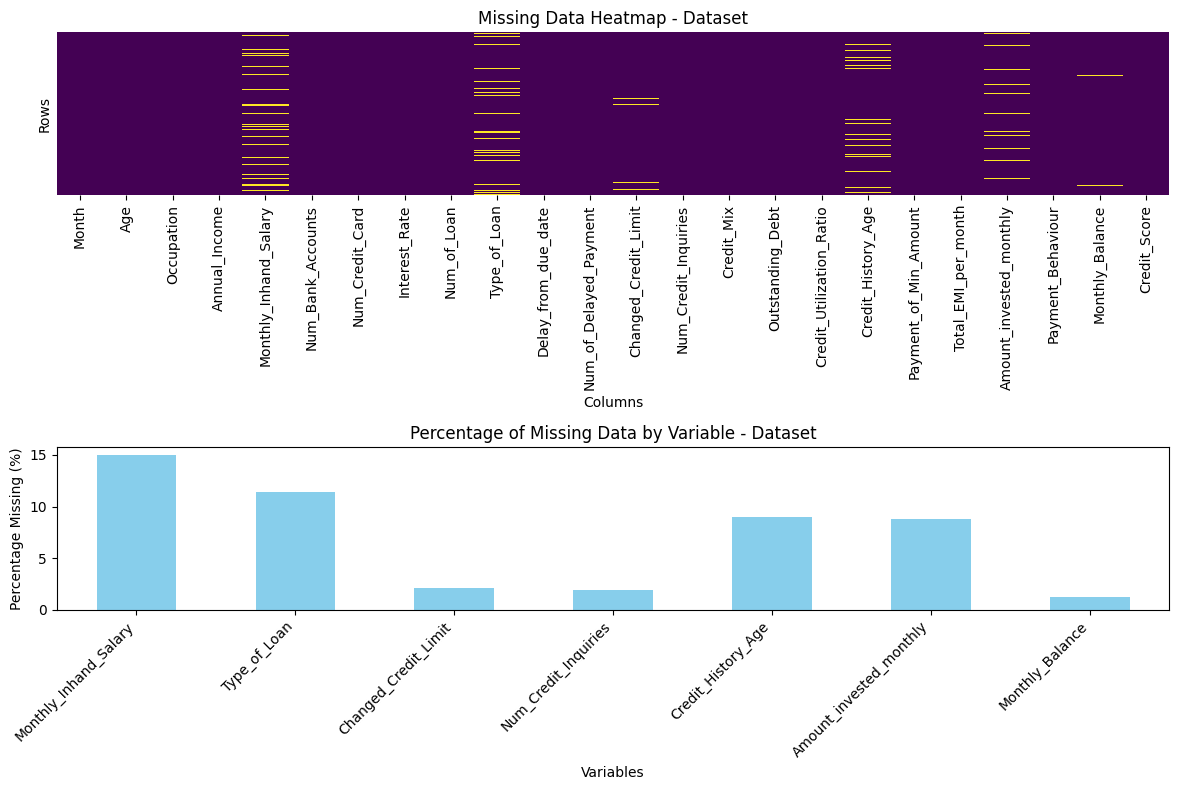

In [24]:
from lib.analysis.reports import report_missing_data
report_missing_data(df)

In [25]:
# Credit_History_Age
median_value = df['Credit_History_Age'].median()
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(median_value)

In [26]:
df['Type_of_Loan'] = df['Type_of_Loan'].fillna("Unknown")

In [27]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median())

In [28]:
for col in ['Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance']:
    df[col] = df[col].fillna(df[col].median())

In [29]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.impute import SimpleImputer

# # Separate rows with and without missing Monthly_Inhand_Salary
# train_data = df[df['Monthly_Inhand_Salary'].notna()]
# test_data = df[df['Monthly_Inhand_Salary'].isna()]

# # Features for prediction (adjust based on your data)
# features = ['Annual_Income', 'Num_of_Loan']  # Example features
# X_train = train_data[features]
# y_train = train_data['Monthly_Inhand_Salary']
# X_test = test_data[features]

# # Train model and predict
# model = RandomForestRegressor()
# model.fit(X_train, y_train)
# predicted_values = model.predict(X_test)

# # Fill missing values
# df.loc[df['Monthly_Inhand_Salary'].isna(), 'Monthly_Inhand_Salary'] = predicted_values

In [30]:
print("Missing values after imputation:\n", df.isna().sum())

Missing values after imputation:
 Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


# Final Check

In [31]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,Scientist,19114.12,1824.843333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",...,Unknown,809.98,26.822620,265.0,No,49.574949,80.415295,High Spent Small Value Payments,312.494089,Good
1,2,23,Scientist,19114.12,3093.745000,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,31.944960,219.0,No,49.574949,118.280222,Low Spent Large Value Payments,284.629162,Good
2,3,33,Scientist,19114.12,3093.745000,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low Spent Medium Value Payments,331.209863,Good
3,4,23,Scientist,19114.12,3093.745000,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low Spent Small Value Payments,223.451310,Good
4,5,23,Scientist,19114.12,1824.843333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High Spent Medium Value Payments,341.489231,Good


In [57]:
df.dtypes

Month                         int64
Age                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object